# Analyzing Udacity Student Data
In this project we'll analyze Udacity Student Data to derive insights


## Import Libraries and Load Data from CSVs

In [1]:
# Import Libraries
import unicodecsv
from datetime import datetime as dt
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create Read CSV Function
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

# Read in the data from enrollments.csv, daily_engagement.csv, and project_submissions.csv 
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

# Review the first row of each table.
print('This is enrollment data:')
print(enrollments[0])
print('\nThis is engagement data:')
print(daily_engagement[0])
print('\nThis is project submissions data:')
print(project_submissions[0])

This is enrollment data:
{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}

This is engagement data:
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}

This is project submissions data:
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
# Take a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
print(enrollments[0])

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}


In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
print(daily_engagement[0])

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

print(project_submissions[0])

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}


## Problems in the Data

In [6]:
# Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

print(daily_engagement[0]['account_key'])

0


## Investigating the Data

In [7]:
# Find the total number of rows and the number of unique students (account keys) in each table.
def uniqueness(data):
    unique_output = set()
    for data_point in data:
        unique_output.add(data_point['account_key'])
    return unique_output

enrollment_num_rows = len(enrollments)
enrollment_unique_students = uniqueness(enrollments)
enrollment_num_unique_students = len(enrollment_unique_students)

engagement_num_rows = len(daily_engagement) 
engagement_unique_students = uniqueness(daily_engagement)
engagement_num_unique_students = len(engagement_unique_students)

submission_num_rows = len(project_submissions)
submission_unique_students = uniqueness(project_submissions)
submission_num_unique_students = len(submission_unique_students)

print("Number of Rows in Enrollment Table:")
print(enrollment_num_rows)
print("\nNumber of Unique Students in Enrollment Table:")
print(enrollment_num_unique_students)
print("\nNumber of Rows in Engagement Table:")
print(engagement_num_rows)
print("\nNumber of Unique Students in Engagement Table:")
print(engagement_num_unique_students)
print("\nNumber of Rows in Submission Table:")
print(submission_num_rows)
print("\nNumber of Unique Students in Submission Table:")
print(submission_num_unique_students)

Number of Rows in Enrollment Table:
1640

Number of Unique Students in Enrollment Table:
1302

Number of Rows in Engagement Table:
136240

Number of Unique Students in Engagement Table:
1237

Number of Rows in Submission Table:
3642

Number of Unique Students in Submission Table:
743


## Missing Engagement Records

In [8]:
# Find an enrollments where the student is missing from the daily engagement table.
# Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students:
        print(enrollment)
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [9]:
# Find the number of surprising data points 
# (enrollments missing from the engagement table) that remain, if any.
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students and enrollment['join_date'] != enrollment['cancel_date']:
        print enrollment
        num_problem_students += 1
print(num_problem_students)

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [13]:
# Create a dictionary named paid_students containing all students who either
# haven't canceled yet or who remained enrolled for more than 7 days. 
# The keys should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

print(len(paid_students))

995


## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [15]:
# Create a list of rows from the engagement table including only rows where
# the student is one of the paid students you just found, and the date is within
# one week of the student's join date.
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagements)
print len(paid_submissions)

paid_engagement_in_first_week = []
for engagement in paid_engagements:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)

print(len(paid_engagement_in_first_week))

1293
134549
3618
6919


## Exploring Student Engagement

In [16]:
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [17]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [18]:
# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

('Mean:', 306.70832675342825)
('Standard deviation:', 412.99693340852957)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)


## Debugging Data Analysis Code

In [19]:
# Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print(max_minutes)

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] == student_with_max_minutes:
        print(engagement)

3564.7332645
{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 

## Lessons Completed in First Week

In [20]:
# Adapt the code above to find the mean, standard deviation, minimum, and maximum for
# the number of lessons completed by each student during the first week. 
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard Deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    
print(describe_data(lessons_completed_by_account.values()))

('Mean:', 1.636180904522613)
('Standard Deviation:', 3.0025612998294227)
('Minimum:', 0)
('Maximum:', 36)
None


## Number of Visits in First Week

In [21]:
# Find the mean, standard deviation, minimum, and maximum for the number of
# days each student visits the classroom during the first week.
for engagement in paid_engagement_in_first_week:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0
        
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')

print(describe_data(days_visited_by_account.values()))

('Mean:', 2.8673366834170855)
('Standard Deviation:', 2.2551980029196814)
('Minimum:', 0)
('Maximum:', 7)
None


## Splitting out Passing Students

In [22]:
# Create two lists of engagement data for paid students in the first week.
# The first list should contain data for students who eventually pass the subway project,
# and the second list should contain data for students who do not.
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_subway_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [23]:
# Compute metrics to show how students differ for
# students who pass the subway project vs. students who don't.
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagmenet_by_account = group_data(non_passing_engagement, 'account_key')

def metrics(data,key):
    metric = sum_grouped_items(data,key)
    describe_data(metric.values())
    return metric.values()


print('Non-Passing Students Minutes:')
metric_nps_minutes = metrics(non_passing_engagmenet_by_account,'total_minutes_visited')

print('\nPassing Students Minutes:')
metric_ps_minutes = metrics(passing_engagement_by_account,'total_minutes_visited')

print('\nNon-Passing Students Lessons:')
metric_nps_lessons = metrics(non_passing_engagmenet_by_account,'lessons_completed')

print('\nPassing Students Lessons:')
metric_ps_lessons = metrics(passing_engagement_by_account,'lessons_completed')

print('\nNon-Passing Students Visited:')
metric_nps_visited = metrics(non_passing_engagmenet_by_account,'has_visited')

print('\nPassing Students Visited:')
metric_ps_visited = metrics(passing_engagement_by_account,'has_visited')

Non-Passing Students Minutes:
('Mean:', 143.32647426675584)
('Standard Deviation:', 269.53861901149509)
('Minimum:', 0.0)
('Maximum:', 1768.5227493319999)

Passing Students Minutes:
('Mean:', 394.58604648350865)
('Standard Deviation:', 448.4995193265521)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)

Non-Passing Students Lessons:
('Mean:', 0.86206896551724133)
('Standard Deviation:', 2.5491599418312028)
('Minimum:', 0)
('Maximum:', 27)

Passing Students Lessons:
('Mean:', 2.0525502318392581)
('Standard Deviation:', 3.1422270555779344)
('Minimum:', 0)
('Maximum:', 36)

Non-Passing Students Visited:
('Mean:', 1.9051724137931034)
('Standard Deviation:', 1.9057314413619049)
('Minimum:', 0)
('Maximum:', 7)

Passing Students Visited:
('Mean:', 3.3848531684698608)
('Standard Deviation:', 2.2588214709184595)
('Minimum:', 0)
('Maximum:', 7)


## Making Histograms

Populating the interactive namespace from numpy and matplotlib


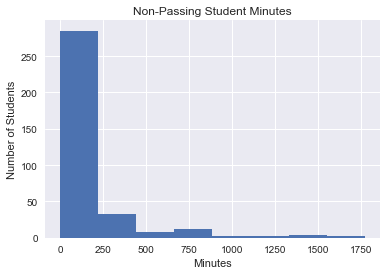

In [24]:
# Histograms of the three metrics for both
# students who passed the subway project and students who didn't.
%pylab inline
plt.hist(metric_nps_minutes, bins=8)
plt.xlabel('Minutes')
plt.ylabel('Number of Students')
plt.title('Non-Passing Student Minutes')

Populating the interactive namespace from numpy and matplotlib


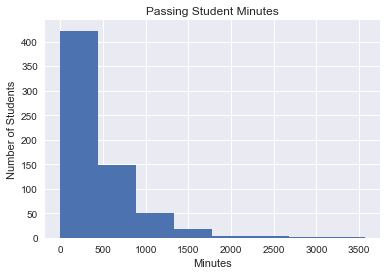

In [25]:
%pylab inline
plt.hist(metric_ps_minutes, bins=8)
plt.xlabel('Minutes')
plt.ylabel('Number of Students')
plt.title('Passing Student Minutes')

Populating the interactive namespace from numpy and matplotlib


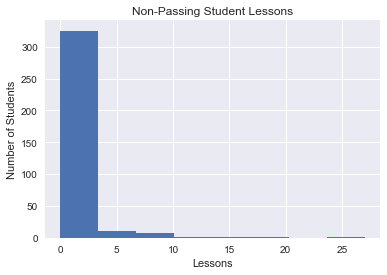

In [26]:
%pylab inline
plt.hist(metric_nps_lessons, bins=8)
plt.xlabel('Lessons')
plt.ylabel('Number of Students')
plt.title('Non-Passing Student Lessons')

Populating the interactive namespace from numpy and matplotlib


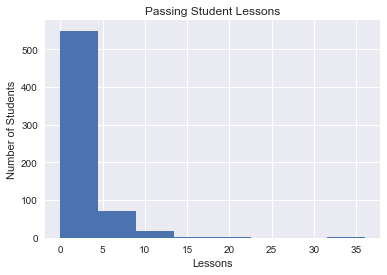

In [27]:
%pylab inline
plt.hist(metric_ps_lessons, bins=8)
plt.xlabel('Lessons')
plt.ylabel('Number of Students')
plt.title('Passing Student Lessons')

Populating the interactive namespace from numpy and matplotlib


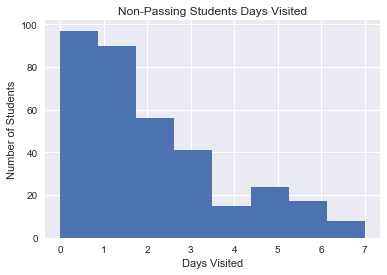

In [28]:
%pylab inline
plt.hist(metric_nps_visited, bins=8)
plt.xlabel('Days Visited')
plt.ylabel('Number of Students')
plt.title('Non-Passing Students Days Visited')

Populating the interactive namespace from numpy and matplotlib


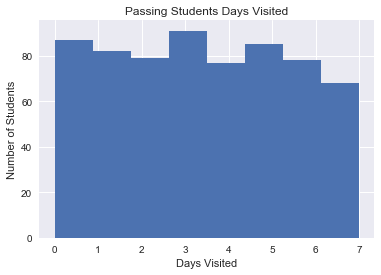

In [29]:
%pylab inline
plt.hist(metric_ps_visited, bins=8)
plt.xlabel('Days Visited')
plt.ylabel('Number of Students')
plt.title('Passing Students Days Visited')